<a href="https://colab.research.google.com/github/tomoi17/q-macro/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ドイツの実際のGDPの標準偏差（対数）：0.10883530031026478
日本の実際のGDPの標準偏差（対数）：0.06131988914685306
ドイツと日本の実際のGDPの対数データの相関係数：0.9583211208269004


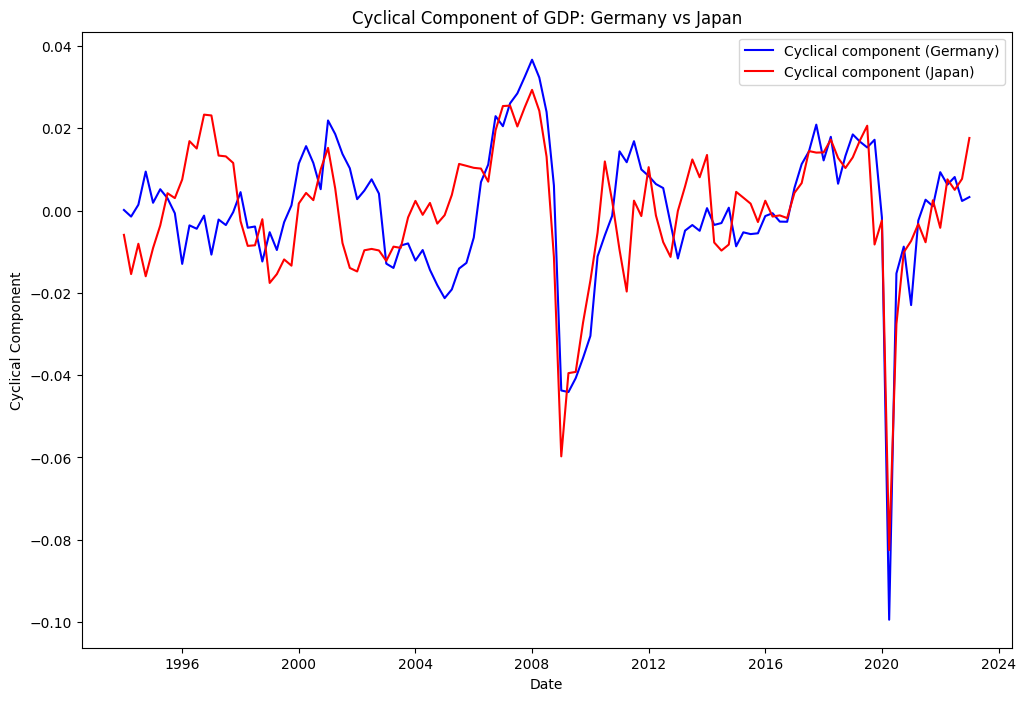

In [15]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot

# set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2023-01-01'

# download the data from FRED using pandas_datareader
gdp_ger = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)

# take the logarithm of the GDP data
log_gdp_ger = np.log(gdp_ger)
log_gdp_jp = np.log(gdp_jp)

# calculate the quarterly percent change in real GDP
gdp_pct_change_ger = log_gdp_ger.pct_change(4)
gdp_pct_change_jp = log_gdp_jp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_ger, trend_ger = sm.tsa.filters.hpfilter(log_gdp_ger, lamb=1600)
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)

# Create an interactive plot using Plotly
fig = go.Figure()

# Add traces for Germany GDP and trend
fig.add_trace(go.Scatter(x=log_gdp_ger.index, y=log_gdp_ger['CLVMNACSCAB1GQDE'], mode='lines', name='Log GDP (Germany)'))
fig.add_trace(go.Scatter(x=log_gdp_ger.index, y=trend_ger, mode='lines', name='Trend (Germany)'))

# Add layout information
fig.update_layout(title='Germany GDP and Trend',
                  xaxis_title='Date',
                  yaxis_title='Log GDP',
                  template='plotly_dark')

# Show the interactive plot
fig.show()

# Create another interactive plot for Japan GDP and trend
fig2 = go.Figure()

# Add traces for Japan GDP and trend
fig2.add_trace(go.Scatter(x=log_gdp_jp.index, y=log_gdp_jp['JPNRGDPEXP'], mode='lines', name='Log GDP (Japan)'))
fig2.add_trace(go.Scatter(x=log_gdp_jp.index, y=trend_jp, mode='lines', name='Trend (Japan)'))

# Add layout information
fig2.update_layout(title='Japan GDP and Trend',
                   xaxis_title='Date',
                   yaxis_title='Log GDP',
                   template='plotly_dark')

# Show the interactive plot for Japan
fig2.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the standard deviation
std_dev_ger = log_gdp_ger['CLVMNACSCAB1GQDE'].std()
std_dev_jp = log_gdp_jp['JPNRGDPEXP'].std()

# Calculate the covariance
covariance_matrix = np.cov(log_gdp_ger['CLVMNACSCAB1GQDE'], log_gdp_jp['JPNRGDPEXP'])
covariance = covariance_matrix[0, 1]

# Calculate the correlation coefficient
correlation = covariance / (std_dev_ger * std_dev_jp)


# Display the results
print(f"ドイツの実際のGDPの標準偏差（対数）：{std_dev_ger}")
print(f"日本の実際のGDPの標準偏差（対数）：{std_dev_jp}")
print(f"ドイツと日本の実際のGDPの対数データの相関係数：{correlation}")

# Statistical measures of Japan's business cycle component
cycle_jp_mean = cycle_jp.mean()
cycle_jp_std = cycle_jp.std()

# Plot the business cycle components of Germany and Japan in one graph
plt.figure(figsize=(12, 8))

# Plot the business cycle component of Germany
plt.plot(cycle_ger, label="Cyclical component (Germany)", color='blue')

# Plot the business cycle component of Japan
plt.plot(cycle_jp, label="Cyclical component (Japan)", color='red')

# Set the title and axis labels of the graph
plt.title('Cyclical Component of GDP: Germany vs Japan')
plt.xlabel('Date')
plt.ylabel('Cyclical Component')

# Display the legend
plt.legend()

# Show the graph
plt.show()

